In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam as adam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import sys
sys.tracebacklimit = 0

Let's download the dataframe:

In [16]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_train, h, w, n_chan = tuple(train_x.shape)

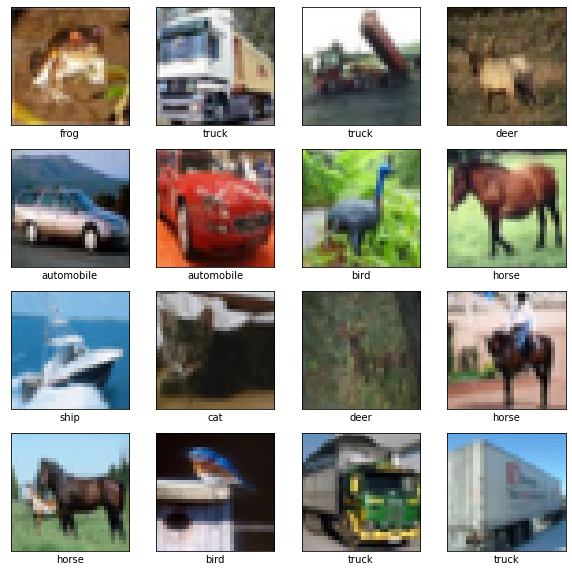

In [27]:
n_plot = 4  # set number of nodes per axis

plt.figure(figsize=(10,10))
for i in range(n_plot**2):
    plt.subplot(n_plot,n_plot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

And normalise the dependent variables, subtracting the mean brightness from each channel following scaling.

In [17]:
train_x, test_x = (train_x/255 - .5, test_x/255 - .5)

Now we can begin assembling our model.

In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(h, w, n_chan)),
    keras.layers.Conv2D(32, 3, activation='relu', padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.2),
    
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 3, activation='relu', padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    keras.layers.Dropout(.2),
    
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(64, 3, activation='relu', padding='valid'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),

    keras.layers.Flatten(),
    keras.layers.Dropout(.4),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')
    ])

model.compile(optimizer=adam(lr=(5*10**-4)),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)         

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 69us/sample - loss: 2.2446 - accuracy: 0.1856 - val_loss: 2.2050 - val_accuracy: 0.2391
Epoch 2/100
50000/50000 [==============================] - 2s 49us/sample - loss: 2.1540 - accuracy: 0.2922 - val_loss: 2.0951 - val_accuracy: 0.3613
Epoch 3/100
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0857 - accuracy: 0.3677 - val_loss: 2.0367 - val_accuracy: 0.4166
Epoch 4/100
50000/50000 [==============================] - 2s 50us/sample - loss: 2.0506 - accuracy: 0.4043 - val_loss: 2.0438 - val_accuracy: 0.4097
Epoch 5/100
50000/50000 [==============================] - 2s 50us/sample - loss: 2.0267 - accuracy: 0.4287 - val_loss: 1.9875 - val_accuracy: 0.4688
Epoch 6/100
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0031 - accuracy: 0.4538 - val_loss: 1.9681 - val_accuracy: 0.4870
Epoch 7/100
50000/50000 [=========================

50000/50000 [==============================] - 2s 50us/sample - loss: 1.7025 - accuracy: 0.7574 - val_loss: 1.7003 - val_accuracy: 0.7599
Epoch 55/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.7026 - accuracy: 0.7588 - val_loss: 1.7112 - val_accuracy: 0.7488
Epoch 56/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.7016 - accuracy: 0.7589 - val_loss: 1.7017 - val_accuracy: 0.7587
Epoch 57/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6969 - accuracy: 0.7642 - val_loss: 1.6959 - val_accuracy: 0.7651
Epoch 58/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.6952 - accuracy: 0.7652 - val_loss: 1.6975 - val_accuracy: 0.7606
Epoch 59/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6944 - accuracy: 0.7661 - val_loss: 1.6947 - val_accuracy: 0.7657
Epoch 60/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.6948 - accuracy: 0.765

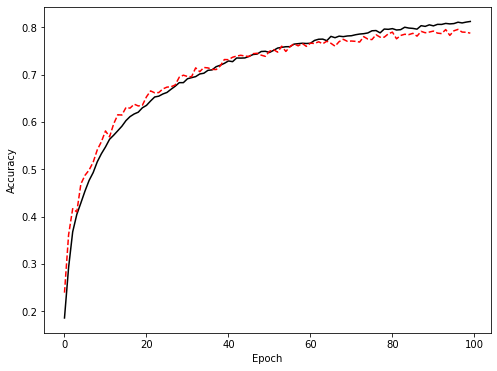

In [26]:
history = model.fit(train_x, train_y, epochs=100, batch_size=500,
                    validation_data=(test_x, test_y), verbose=1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['accuracy'], 'k', label='accuracy')
ax.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend

fig.show()